# Numerik

In [2]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Diskrete Fouriertransformation (DFT)

Folgende Textteile stammen aus der SciPy-Dokumentation [Fourier Transforms](http://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html):

Fourier analysis is a method for expressing a function as a sum of periodic components, and for recovering the signal from those components. When both the function and its Fourier transform are replaced with discretized counterparts, it is called the discrete Fourier transform (DFT). The DFT has become a mainstay of numerical computing in part because of a very fast algorithm for computing it, called the Fast Fourier Transform (FFT), which was known to Gauss (1805) and was brought to light in its current form by Cooley and Tukey.

The FFT $y[k]$ of length $N$ of the length-$N$ sequence $x[n]$ is defined as 

$$y[k] = \sum_{n=0}^{N-1} e^{-2 \pi j \frac{k n}{N} } x[n],$$ 

and the inverse transform is defined as 

$$x[n] = \frac{1}{N} \sum_{k=0}^{N-1} e^{2 \pi j \frac{k n}{N} } y[k].$$

These transforms can be calculated by means of `fft` and `ifft`, respectively.

Properties:

- For $N$ even, the elements $y[1]...y[N/2 - 1]$ contain the positive-frequency terms, and the elements $y[N/2]...y[N - 1]$ contain the negative-frequency terms, in order of decreasingly negative frequency. 

- For $N$ odd, the elements $y[1]...y[(N - 1)/2]$ contain the positive- frequency terms, and the elements $y[(N + 1)/2]...y[N - 1]$ contain the negative-frequency terms, in order of decreasingly negative frequency.

- In case the sequence $x$ is real-valued, the values of $y[n]$ for positive frequencies is the conjugate of the values $y[n]$ for negative frequencies (because the spectrum is symmetric). Therefore, typically, only the FFT corresponding to positive frequencies is plotted.

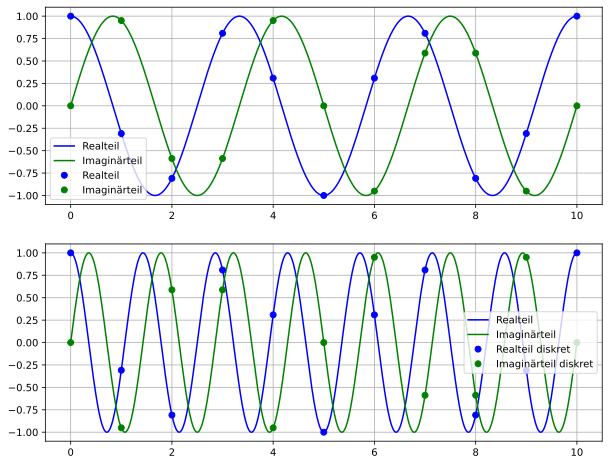

In [3]:
# Basisfunktionen:

N = 10

figure(figsize=(10, 8))
subplot(2,1,1)
k = 3
n_ = arange(0, N + 1)
b_ = exp(1j*k*(2*pi)/N*n_)
t_ = linspace(0, N, 1000)
bt_ = exp(1j*k*(2*pi)/N*t_)
plot(t_, bt_.real, '-b', label='Realteil')
plot(t_, bt_.imag, '-g', label='Imaginärteil')
plot(n_, b_.real, 'ob', label='Realteil')
plot(n_, b_.imag, 'og', label='Imaginärteil')
legend()
grid(True)

subplot(2,1,2)
k = 7
n_ = arange(0, N + 1)
b_ = exp(1j*k*(2*pi)/N*n_)
t_ = linspace(0, N, 1000)
bt_ = exp(1j*k*(2*pi)/N*t_)
plot(t_, bt_.real, '-b', label='Realteil')
plot(t_, bt_.imag, '-g', label='Imaginärteil')
plot(n_, b_.real , 'ob', label='Realteil diskret')
plot(n_, b_.imag , 'og', label='Imaginärteil diskret')
legend(loc='best')
grid(True)

The following example plots the FFT of the sum of two sines.

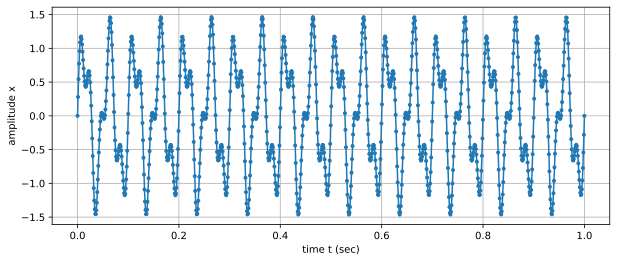

In [4]:
from scipy.fftpack import fft

# Number of samplepoints
N = 1000
# sample spacing
T = 1/N
t = linspace(0, N*T, N)
x = sin(20*2*pi*t) + 0.5*sin(50*2*pi*t)

figure(figsize=(10,4))
plot(t, x, '.-')
xlabel('time t (sec)')
ylabel('amplitude x')
grid(True)

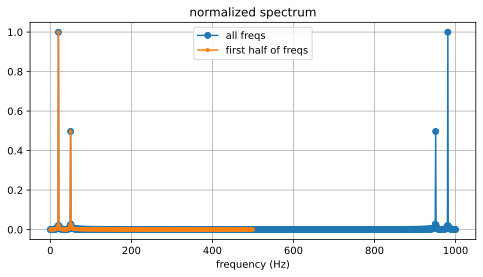

In [5]:
y = fft(x)
freq = linspace(0, 1/(2*T), N//2)
freq_all = linspace(0, 1/T, N)

figure(figsize=(8,4))
plot(freq_all, 2/N*abs(y),'o-', label='all freqs')
plot(freq,     2/N*abs(y[0:N//2]),'.-', label='first half of freqs')
xlabel('frequency (Hz)')
title('normalized spectrum')
legend()
grid(True)

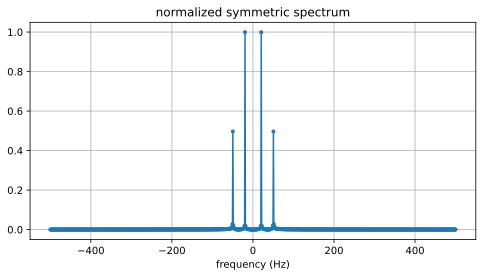

In [6]:
N = 1000
freq_all = linspace(-1/(2*T), 1/(2*T), N)

y_sym = zeros_like(freq_all)
y_sym[0:N//2] = 2/N*abs(y)[N//2:]
y_sym[N//2: ] = 2/N*abs(y)[0:N//2]

figure(figsize=(8,4))
plot(freq_all, y_sym,'.-')

xlabel('frequency (Hz)')
title('normalized symmetric spectrum')
grid(True)

## Aufgaben

### Aufgabe 1: weißes Rauschen

Berechnen Sie das normalisierte Spektrum eines Zufallsignals. Weshalb heißt ein Zufallsignal auch *weißes Rauschen*?

**Lösung:**

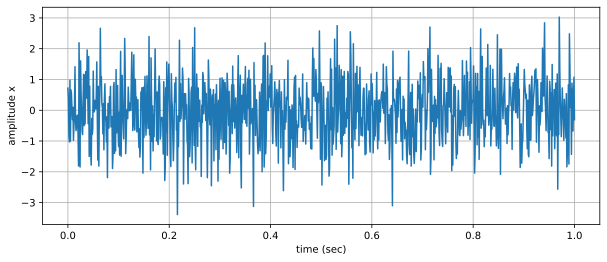

In [7]:
# Number of samplepoints
N = 1000
# sample spacing
T = 1/1000
t = linspace(0, N*T, N)
x = randn(N)

figure(figsize=(10,4))
plot(t, x)
xlabel('time (sec)')
ylabel('amplitude x')
grid(True)

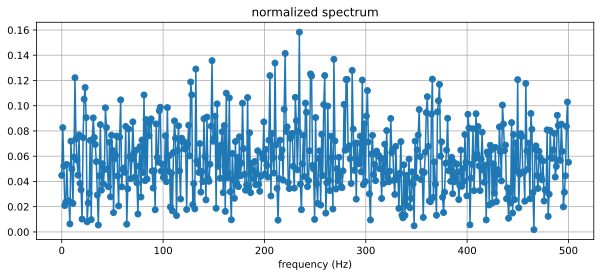

In [8]:
y = fft(x)
freq = linspace(0, 1/(2*T), N//2)

figure(figsize=(10,4))
plot(freq, 2/N*abs(y[0:N//2]),'o-')
xlabel('frequency (Hz)')
title('normalized spectrum')
grid(True)

Ein Zufallsignal heißt auch *weißes Rauschen*, weil in seinem Spektrum alle Frequenzen vorkommen, so wie in weißem Licht alle Farben, also Frequenzen, vorkommen.

### Aufgabe 2: (inverse) DFT
Verwenden Sie die (inverse) DFT, um aus dem Signal 
```
x = sin(20*2*pi*t) + 0.5*sin(50*2*pi*t)
```
die Sinusschwingung der höheren Frequenz heraus zu filtern.

**Lösung:**

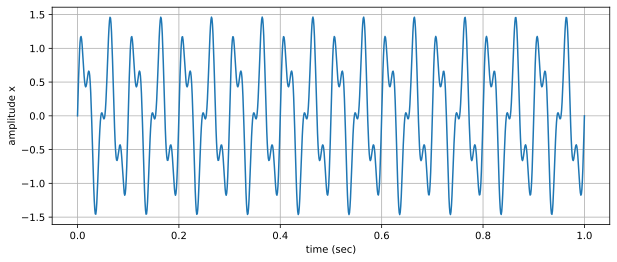

In [9]:
# Number of samplepoints
N = 1000
# sample spacing
T = 1/N
t = linspace(0, N*T, N)
x = sin(20*2*pi*t) + 0.5*sin(50*2*pi*t)
y = fft(x)
freq = linspace(0, 1/(2*T), N//2)

K = 45
z = y
z[K:N-K] = 0
w = ifft(z)

figure(figsize=(10,4))
plot(t, x)
xlabel('time (sec)')
ylabel('amplitude x')
grid(True)

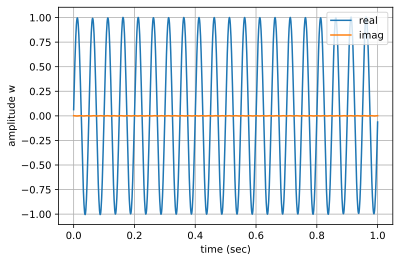

In [10]:
figure(figsize=(6,4))
plot(t, real(w), label='real')
plot(t, imag(w), label='imag')
xlabel('time (sec)')
ylabel('amplitude w')
legend()
grid(True)